# Short report - What are the tasks and process of a Data Scientist?
The process of a data scientist typically involves the following steps:

Define the problem: The first step is to clearly define the problem being addressed, and identify the relevant data sources.

Gather and clean the data: The next step is to acquire and clean the data, ensuring that it is in a format suitable for analysis.

Explore the data: Once the data is cleaned, the data scientist can then explore it to gain a better understanding of its characteristics.

Build predictive models: The next step is to build predictive models that can analyze the data and make predictions.

Evaluate the models: Once the models are built, the data scientist needs to evaluate their performance and ensure that they are accurate.

## Example

In [74]:
# Train a decision tree to predict one of the categorical columns of the dataset. So we need to predict
# one of the categorical columns of the dataset and we have to use the movies.csv dataset.

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

def plot_tree(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features, 
                          class_names=class_names, 
                          filled=True, rounded=True, 
                          special_characters=True) 

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [76]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [77]:
import pandas as pd
import numpy as np
df = pd.read_csv('movies.csv', sep=';', thousands=',')
df.head()

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,1.0,The Godfather,1972,R,175 min,Comedy,9.2,1860471,$134.97M
1,2.0,The Silence of the Lambs,1991,R,118 min,Crime,8.6,1435344,$130.74M
2,3.0,Star Wars: Episode V - The Empire Strikes Back,1980,PG,124 min,Fantasy,8.7,1294805,$290.48M
3,4.0,The Shawshank Redemption,1994,R,142 min,Drama,9.3,2683302,$28.34M
4,5.0,The Shining,1980,R,146 min,Horror,8.4,1025560,$44.02M


In [78]:
df.isna().sum() # We check if the data has any missing values, we do not use gross_total for this analysis
# so the data is suitable.

index              0
movie_name         0
year_of_release    0
category           0
run_time           0
genre              0
imdb_rating        0
votes              0
gross_total        1
dtype: int64

In [79]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42, stratify=df['genre'])
print(df_train.shape, df_test.shape) # We split it into a training set and a test set

(70, 9) (30, 9)


In [80]:
# We use the input to create predictive models

In [81]:
features= ['imdb_rating', 'votes']
dt_classification = DecisionTreeClassifier(max_depth = 13) # Increase max_depth to see effect in the plot
dt_classification.fit(df_train[features], df_train['genre'])

DecisionTreeClassifier(max_depth=13)

In [82]:
# We create predictions

In [83]:
predictionsOnTrainset = dt_classification.predict(df_train[features])
predictionsOnTestset = dt_classification.predict(df_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, df_train.genre)
accuracyTest = calculate_accuracy(predictionsOnTestset, df_test.genre)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.9428571428571428
Accuracy on test set 0.2


In [84]:
# And we evaluate their performance

In [85]:
# -Is the accurracy different? Did you expect this difference?

# The accuracy of the training set and the test set has a difference of about 0.74. 
# Yes, I expected this difference because of the max_depth of 13 that causes overfit, 
# it becomes too specialized in the training data and performs poorly on new, unseen data. 
# Also because there is not much data to train, there are only 70 rows to test across 10 genres.

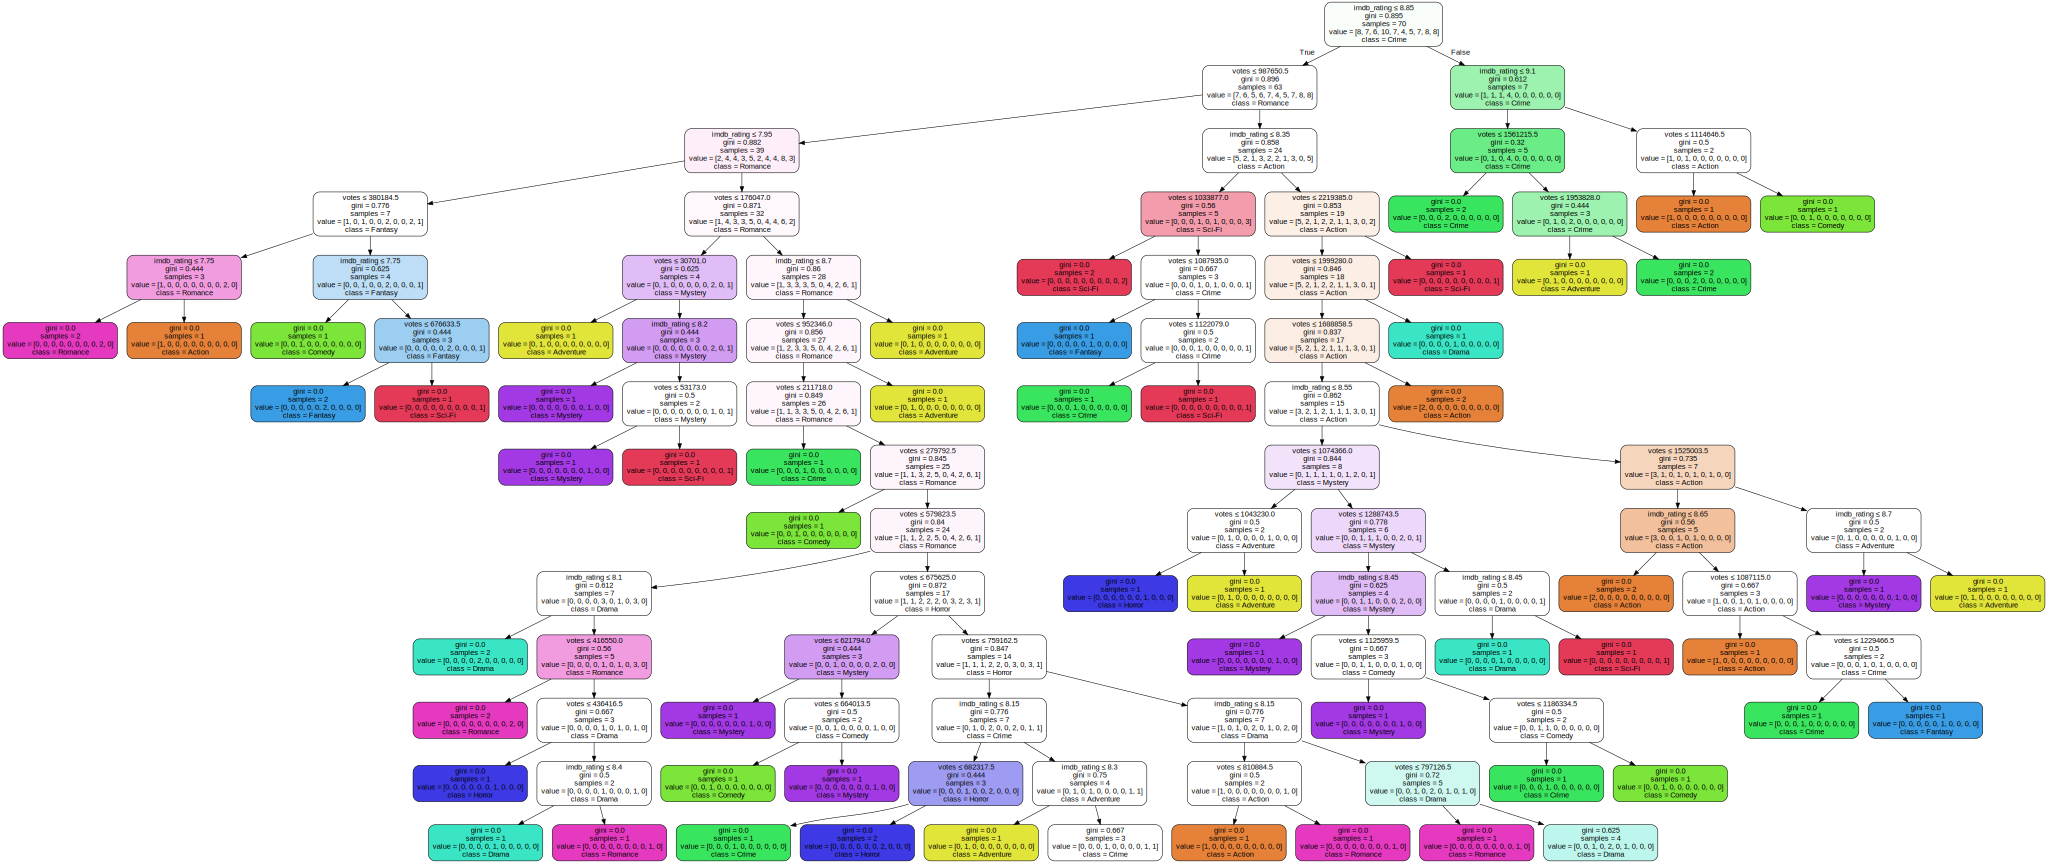

In [86]:
plot_tree(dt_classification, features, np.sort(df.genre.unique()))

In [87]:
# -Do you understand the tree?

# Yes, it compares the average of the imdb_rating and puts it to the left if its true, 
# and right if false. After that it compares the votes then the same riddle goes on.